In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine learning/Homework06

/content/drive/MyDrive/Colab Notebooks/Machine learning/Homework06




---


**Task1. Prepare the dataset / Task 2. Data Loading**


---



In [2]:
import pandas as pd 
hw_data = pd.read_csv("homework06_data.csv")
hw_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Target_out
0,7.2,0.240,0.34,1.1,0.045,3.0,64.0,0.99130,3.23,0.51,11.4,5
1,5.7,0.255,0.65,1.2,0.079,17.0,137.0,0.99307,3.20,0.42,9.4,5
2,6.7,0.150,0.32,7.9,0.034,17.0,81.0,0.99512,3.29,0.31,10.0,6
3,9.2,0.230,0.30,1.1,0.031,40.0,99.0,0.99290,2.94,0.30,10.4,6
4,7.7,0.240,0.30,1.4,0.041,15.0,102.0,0.99290,3.26,0.53,10.4,6




---


**Task 3. Data Inspection**


---



In [3]:
hw_data.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Target_out'],
      dtype='object')

In [4]:
hw_data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Target_out
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


base on the .info() all columns shows 4898 non-null, means we don't have missing value

In [5]:
hw_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   4898 non-null   float64
 1   Feature_2   4898 non-null   float64
 2   Feature_3   4898 non-null   float64
 3   Feature_4   4898 non-null   float64
 4   Feature_5   4898 non-null   float64
 5   Feature_6   4898 non-null   float64
 6   Feature_7   4898 non-null   float64
 7   Feature_8   4898 non-null   float64
 8   Feature_9   4898 non-null   float64
 9   Feature_10  4898 non-null   float64
 10  Feature_11  4898 non-null   float64
 11  Target_out  4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB




---


**Task 4.  Data Visualization**


---



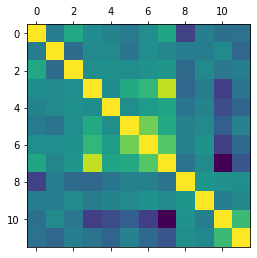

In [24]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

corr = hw_data.corr()
features = [1,2,3,4,5,6,7,8,9,10,11,'target'] 
plt.matshow(corr)


**Question: Are there any highly correlated features in the data (either negative or positive correlation)? Provide the description in the notebook as well.**

base on fig above, index 3(feature 4) and index 7(feature 8) is highly positive correlated.
And index 7(feature 8) and index10(feature 11) is highly negative correlated.

look at how much each attribute correlates with Feature_1

In [ ]:
corr['Feature_1'].sort_values(ascending=False)

Feature_1     1.000000
Feature_3     0.289181
Feature_8     0.265331
Feature_7     0.091070
Feature_4     0.089021
Feature_5     0.023086
Feature_10   -0.017143
Feature_2    -0.022697
Feature_6    -0.049396
Target_out   -0.113663
Feature_11   -0.120881
Feature_9    -0.425858
Name: Feature_1, dtype: float64

**Question: Do we require feature scaling on this data? Which features should be taken care of? Provide an explanation in the notebook about why the feature scaling is required for this data.**

base on the plt below we need to apply the scaling. most of the features are below 50 but feature 7 mean is around 150.

Text(0, 0.5, 'Values')

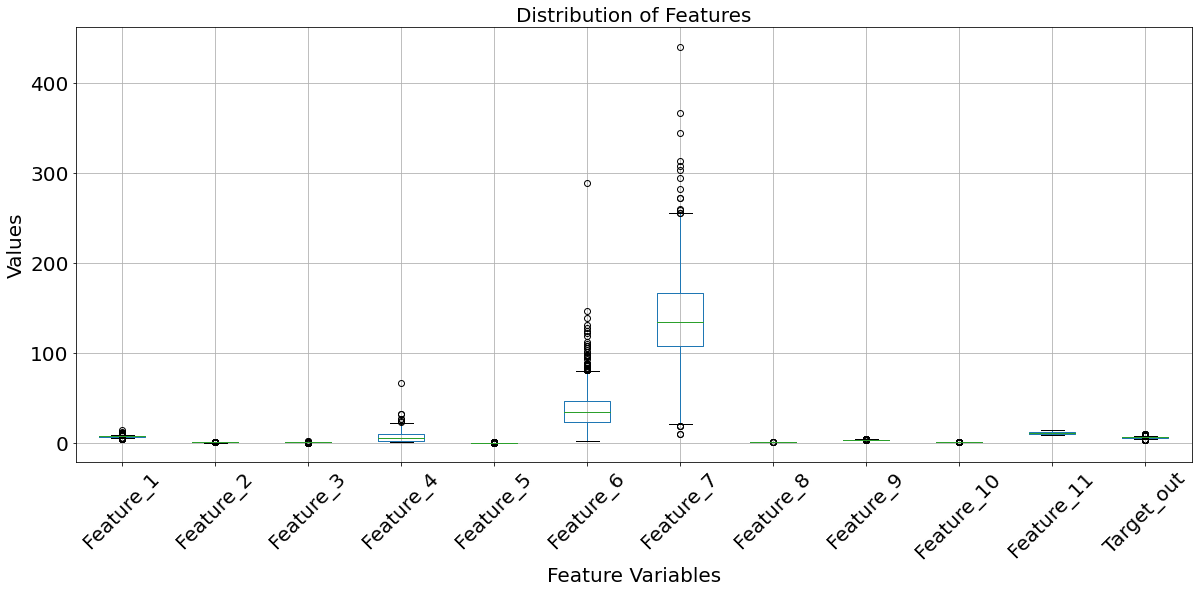

In [ ]:
import matplotlib.pyplot as plt

boxplot = pd.DataFrame.boxplot(hw_data, rot=45, fontsize=20,figsize=(20,8))
boxplot.set_title("Distribution of Features",fontsize=20)
boxplot.set_xlabel("Feature Variables",fontsize=20)
boxplot.set_ylabel("Values",fontsize=20)


**Question: Do you think this data is balanced or imbalanced? Any suggestions to handle this imbalanced data?**

I don't think it is bias, it look like bell shape.

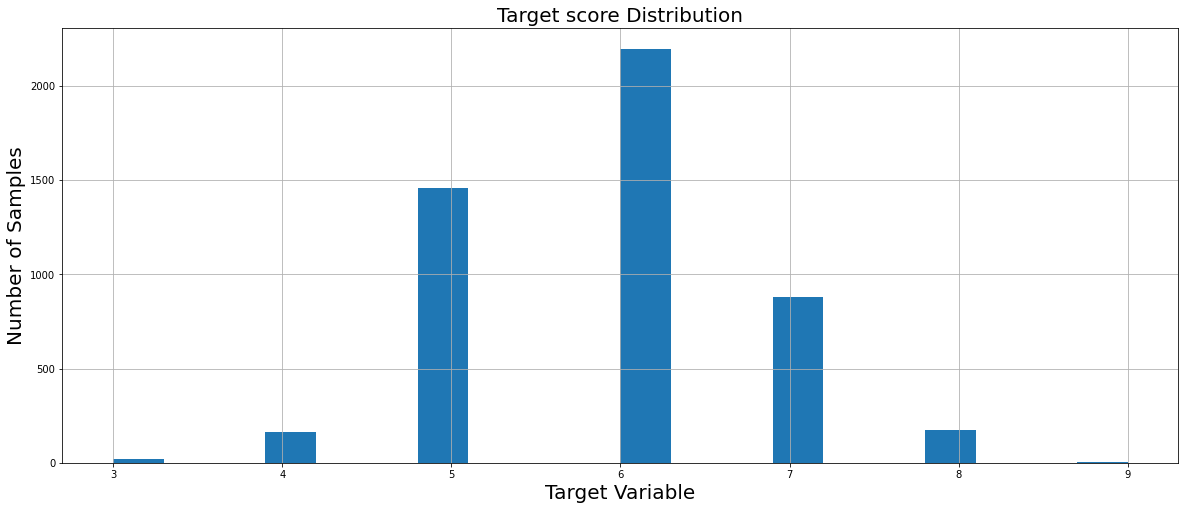

In [ ]:
import matplotlib.pyplot as plt
hw_data['Target_out'].hist(bins=20, figsize=(20,8))
plt.xlabel("Target Variable",fontsize=20)
plt.ylabel("Number of Samples", fontsize=20)
plt.title("Target score Distribution", fontsize=20)
plt.show()



---


**Task 5. Dividing the dataset into separate training and test dataset**


---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(hw_data,test_size=0.3, random_state=42)



---


**Task6. Perform Feature Scaling - Standardization on the dataset**


---



In [ ]:
train_target = X_train['Target_out'].copy()
# train_target = pd.DataFrame(X_train['Target_out'])
train_feature = X_train.drop(columns='Target_out')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_feature_StandardScaler = scaler.fit_transform(train_feature)
print(train_feature_StandardScaler)

[[ 0.26915419  1.54336768  2.27441814 ... -0.51316415 -0.34200176
  -1.49101961]
 [ 0.85721065  1.69444032  0.86572443 ...  1.95489621 -1.1385772
  -0.43282677]
 [-1.1421813  -0.37021904 -0.62583362 ...  1.02103553 -0.34200176
  -0.83982402]
 ...
 [-0.67173613 -0.26950395 -0.87442663 ... -0.31305114 -1.22708558
  -0.67702512]
 [-0.90695872 -0.57164922  0.53426708 ... -1.04679882 -1.6696275
   1.03236332]
 [-0.78934742  4.86696567 -2.69744203 ...  0.08717486  3.99490898
   2.57895285]]


Text(0, 0.5, 'Values')

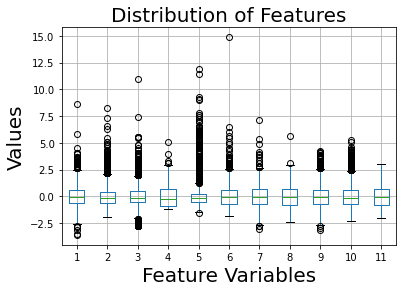

In [ ]:
a= pd.DataFrame(train_feature_StandardScaler)

a.columns=list(range(1,len(a.columns)+1)) #change pd col index to the correct feature name

boxplot = a.boxplot()

boxplot.set_title("Distribution of Features",fontsize=20)
boxplot.set_xlabel("Feature Variables",fontsize=20)
boxplot.set_ylabel("Values",fontsize=20)




---


**Task7. Let's create a binary classification dataset by cutting the target values into two categories (<6, >=6)**


---



In [ ]:
# Separate out the features and targets
train_target[train_target<6] = 0
train_target[train_target>=6] = 1

In [ ]:
train_target

736     0
1620    1
336     1
2302    1
2673    1
       ..
4426    0
466     1
3092    1
3772    1
860     1
Name: Target_out, Length: 3428, dtype: int64



---


**Task 8. Build several classification models for binary classification.**


---



In [ ]:
test_target = X_test['Target_out'].copy()
# train_target = pd.DataFrame(X_train['Target_out'])
test_feature = X_test.drop(columns='Target_out')

In [ ]:
test_target[test_target<6] = 0
test_target[test_target>=6] = 1

In [ ]:
test_target

4656    0
3659    1
907     1
4352    0
3271    1
       ..
4235    0
4588    0
3377    0
1503    1
1971    0
Name: Target_out, Length: 1470, dtype: int64

**(1) Task 8.1: Logistic regression**


---



**Q1: Why does the logistic regression can be used for binary classification?**

Because when data is linearly separable and the outcome is binary, it can use as binary classification.

**Q2: What's the cost function for logistic regression to implement the binary classification**

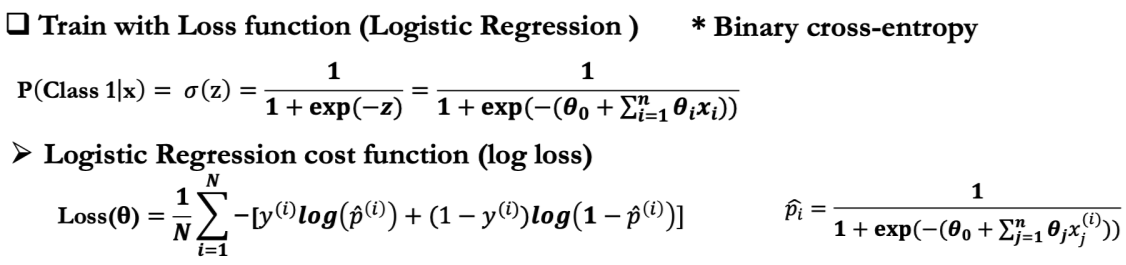

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'l2', C = 1, random_state = 0)
logistic_model.fit(train_feature, train_target)
predictions_logistic = logistic_model.predict(test_feature)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions_logistic

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(len(predictions_logistic))

1470


**(2) Task 8.2: Support Vector Machine**


---



**Q1: What's the objective of SVM to find the optimal linear classifier (Chapter 5: P153)?**

 Try to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

**Q2: What are available kernel functions for SVM to conduct linear and non-linear classification (Chapter 5: P154-P162)?**

for non-linear classification we can use kernel = "poly", and use kernel = "rbf" to make the bell shape classification, make boundary more close to the feature.

In [ ]:
from sklearn.svm import SVC
# define linear kernel, P156
svm_model_linear = SVC(C = 1 ) 
svm_model_linear.fit(train_feature, train_target)
predictions_SVC_linear = svm_model_linear.predict(test_feature)

# define polynomial kernel, P158
svm_model_polynomial = SVC(kernel = "poly", degree = 3, C = 5 ) 
svm_model_polynomial.fit(train_feature, train_target)
predictions_SVC_polynomial = svm_model_polynomial.predict(test_feature)


# define Gaussian RBF kernel, P160
svm_model_rbf = SVC(kernel = "rbf", gamma = 'scale', C = 0.001 ) 
svm_model_rbf.fit(train_feature, train_target)
predictions_SVC_rbf = svm_model_rbf.predict(test_feature)

In [ ]:
predictions_SVC_linear

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
predictions_SVC_polynomial

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
predictions_SVC_rbf

array([1, 1, 1, ..., 1, 1, 1])

**(3) Decision Tree**


---



**Q1: Describe how the decision tree is constructed. How is each feature selected as a single node?  (Chapter 6: P179)?**

base on the node condition and decide T or F go into different path until reach the leaf node --> get prediction. 

**Q2: What are hyper-parameters available for decision tree? How to avoid overfitting in decision tree? (Chapter 6: P181-P182)?**

The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features
Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5) # define tree model
decision_tree_model.fit(train_feature, train_target)
predictions_decisionTree = decision_tree_model.predict(test_feature)

In [ ]:
predictions_decisionTree

array([0, 1, 1, ..., 0, 1, 1])

**(4) Random Forest**


---



**Q1: Describe how the ensemble learning works?**

we use same dataset to train different classifier and aggregate the predictions of each classifier and predict the class that gets the most votes.

**Q2: Describe the concepts behind bagging and random patches/subspaces (Chapter 7: P192-P196)?**

* bagging --> sampling is performed with replacement
  * make random sampling and run multiple classifiers, after use voting to dicide the prediction result.
* Sampling both training instances and features is called the Random Patches method.
* Keeping all training instances (i.e., bootstrap=False and max_sam ples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_fea tures smaller than 1.0) is called the Random Subspaces method

**Q3: How does the feature importance work in Random Forest? (Chapter 7: P198-199)**

Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average, then it scales the results so that the sum of all importances is equal to 1.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = None)
random_forest_model.fit(train_feature, train_target)
predictions_randomForest = random_forest_model.predict(test_feature)

In [ ]:
predictions_randomForest

array([0, 0, 1, ..., 0, 1, 0])

**(5) K Nearest-neighbors**


---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski")
knn_model.fit(train_feature, train_target)
predictions_knn = knn_model.predict(test_feature)

In [ ]:
predictions_knn

array([1, 1, 0, ..., 0, 0, 0])



---


**Task 10. Define multiple evaluation metrics, calculate the performance on the test data set. Here we will use five metrics provided in sklearn. The following example is provided:**


---



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
# Make predictions and evaluate
logistic_acc = accuracy_score(test_target, predictions_logistic)
logistic_prec = precision_score(test_target, predictions_logistic )
logistic_recall = recall_score(test_target, predictions_logistic )
logistic_roc = roc_auc_score(test_target, predictions_logistic)
logistic_f1 = f1_score(test_target, predictions_logistic )

print(logistic_acc,logistic_prec,logistic_recall, logistic_roc,logistic_f1)

0.7482993197278912 0.7649154051647373 0.8901554404145078 0.6836915815933925 0.8227969348659004


In [ ]:
SVC_polynomial_acc = accuracy_score(test_target, predictions_SVC_polynomial)
SVC_polynomial_prec = precision_score(test_target, predictions_SVC_polynomial)
SVC_polynomial_recall = recall_score(test_target, predictions_SVC_polynomial)
SVC_polynomial_roc = roc_auc_score(test_target, predictions_SVC_polynomial)
SVC_polynomial_f1 = f1_score(test_target, predictions_SVC_polynomial)

print(SVC_polynomial_acc,SVC_polynomial_prec,SVC_polynomial_recall, SVC_polynomial_roc,SVC_polynomial_f1)

0.6598639455782312 0.65892002734108 0.9989637305699481 0.50542245934438 0.7940691927512357


In [ ]:
decisionTree_acc = accuracy_score(test_target, predictions_decisionTree)
decisionTree_prec = precision_score(test_target, predictions_decisionTree)
decisionTree_recall = recall_score(test_target, predictions_decisionTree)
decisionTree_roc = roc_auc_score(test_target, predictions_decisionTree)
decisionTree_f1 = f1_score(test_target, predictions_decisionTree)

print(decisionTree_acc,decisionTree_prec,decisionTree_recall, decisionTree_roc,decisionTree_f1)

0.754421768707483 0.7926356589147286 0.8476683937823835 0.7119530087723799 0.8192288432648974


In [ ]:
randomForest_acc = accuracy_score(test_target, predictions_randomForest)
randomForest_prec = precision_score(test_target, predictions_randomForest)
randomForest_recall = recall_score(test_target, predictions_randomForest)
randomForest_roc = roc_auc_score(test_target, predictions_randomForest)
randomForest_f1 = f1_score(test_target, predictions_randomForest)

print(randomForest_acc,randomForest_prec,randomForest_recall, randomForest_roc,randomForest_f1)

0.8306122448979592 0.8630831643002028 0.8818652849740932 0.8072692761504129 0.8723731419784726


In [ ]:
knn_acc = accuracy_score(test_target, predictions_knn)
knn_prec = precision_score(test_target, predictions_knn)
knn_recall = recall_score(test_target, predictions_knn)
knn_roc = roc_auc_score(test_target, predictions_knn)
knn_f1 = f1_score(test_target, predictions_knn)

print(knn_acc,knn_prec,knn_recall, knn_roc,knn_f1)

0.6904761904761905 0.744721689059501 0.8041450777202073 0.6387062022264403 0.7732934728450424


In [ ]:
data = {"Method":["Logistic Regression", "SVC_polynomial", "DecisionTree","RandomForest","KNN"],
        "Accuracy":[logistic_acc,SVC_polynomial_acc,decisionTree_acc,randomForest_acc,knn_acc],
        "Precision":[logistic_prec,SVC_polynomial_prec,decisionTree_prec,randomForest_prec,knn_prec],
        "Recall":[logistic_recall,SVC_polynomial_recall,decisionTree_recall,randomForest_recall,knn_recall],
        "F1-score":[logistic_f1,SVC_polynomial_f1,decisionTree_f1,randomForest_f1,knn_f1],
        "AUC score":[logistic_roc,SVC_polynomial_roc,decisionTree_roc,randomForest_roc,knn_roc]
        }
pd.DataFrame.from_dict(data)

,Method,Accuracy,Precision,Recall,F1-score,AUC score
0,Logistic Regression,0.748299,0.764915,0.890155,0.822797,0.683692
1,SVC_polynomial,0.659864,0.658920,0.998964,0.794069,0.505422
2,DecisionTree,0.754422,0.792636,0.847668,0.819229,0.711953
3,RandomForest,0.830612,0.863083,0.881865,0.872373,0.807269
4,KNN,0.690476,0.744722,0.804145,0.773293,0.638706




---


**Task 11. Perform 10-fold cross-validation and hyper-parameter tuning for all models. You can get the best model from random search cross-validation:**


---



**(1) Logistic regression:**


---



In [ ]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
train_feature_scale = standardscaler.fit_transform(train_feature)

In [ ]:
hyperparameter_set = {'C': [1,0.1,0.01,0.001,0.0001,0]}
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV
rand_search_logistic = RandomizedSearchCV(estimator = logistic_model, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
search = rand_search_logistic.fit(train_feature_scale, y = train_target)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line

{'C': 1}






**(2) Support Vector Machine:**


---



In [ ]:
hyperparameter_set = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}
from sklearn.svm import SVC
svm = SVC()
from sklearn.model_selection import RandomizedSearchCV
rand_search_svc = RandomizedSearchCV(estimator = svm, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
search = rand_search_svc.fit(train_feature_scale, y = train_target)
search.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

**(3) Random Forest:**


---



In [ ]:
hyperparameter_set = {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt']}
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=60)
from sklearn.model_selection import RandomizedSearchCV
rand_search_random_forest = RandomizedSearchCV(estimator = random_forest, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
search = rand_search_random_forest.fit(train_feature_scale, y = train_target)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'n_estimators': 200, 'max_features': 'auto'}

**(4) K Nearest-neighbors :**


---



In [ ]:
hyperparameter_set = {'n_neighbors': [3, 5, 7, 9,11]}
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import RandomizedSearchCV
rand_search_knn = RandomizedSearchCV(estimator = knn, param_distributions = hyperparameter_set, n_iter = 10, cv = 10, scoring = 'accuracy', return_train_score = True)
search = rand_search_knn.fit(train_feature_scale, y = train_target)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'n_neighbors': 3}



---


**Task 12. Perform model ensemble using the best models from Task 11**


---



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(C = 1)
clf2 = RandomForestClassifier(n_estimators=200, max_features = 'auto')
clf3 = SVC(kernel = 'rbf', gamma = 0.01, C = 10 ) 
clf4 = KNeighborsClassifier(n_neighbors = 3)
eclf = VotingClassifier(estimators=[("lr",clf1),('rf',clf2),('svc',clf3),("knn",clf4)],voting="hard")

for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['Logistic Regression', 'Random Forest', 'SVC', "KNeighborsClassifier", 'Ensemble']):
  scores = cross_val_score(clf, train_feature_scale, train_target, scoring='accuracy', cv=10)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.75 (+/- 0.03) [Logistic Regression]
Accuracy: 0.82 (+/- 0.02) [Random Forest]
Accuracy: 0.77 (+/- 0.03) [SVC]
Accuracy: 0.76 (+/- 0.02) [KNeighborsClassifier]
Accuracy: 0.80 (+/- 0.02) [Ensemble]




---


**Task 13. Now we can practice the feature importance analysis random forest (Chapter P199).**


---



In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, max_features = 'auto')
random_forest.fit(train_feature, train_target)
random_forest_importance = random_forest.feature_importances_
print(random_forest_importance)

[0.07034247 0.11855078 0.08271121 0.07997277 0.08172487 0.09607295
 0.08623507 0.10772919 0.07396625 0.0640764  0.13861802]


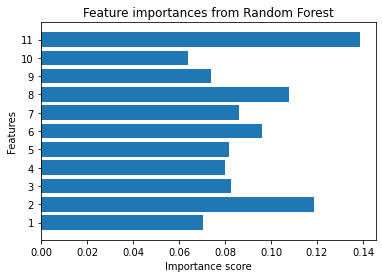

In [ ]:
import matplotlib.pyplot as plt
a = [0.07034247, 0.11855078, 0.08271121, 0.07997277, 0.08172487, 0.09607295,
 0.08623507, 0.10772919, 0.07396625, 0.0640764,  0.13861802]
features = [1,2,3,4,5,6,7,8,9,10,11] 
plt.barh(range(len(a)),a,tick_label=features)
plt.ylabel("Features")
plt.xlabel("Importance score")
plt.title("Feature importances from Random Forest")
plt.show()
